<h1>Day-3</h1>
<h2>Path integral approximations to real time correlations</h2>
<h3>Mariana Rossi, Venkat Kapil, Eszter Sarolta Pos</h3>

In this exercise we will perform simulations of Ice Ih at 200 K, using a  simple empirical force field model based on TIP4P-like point charges. We will use this model to look at different path integral approximations to real time correlations, calculate imaginary time correlations from PI, and look at the relationship between them. The ice box contains 96 water molecules. All files necessary for the exercises below can be found in the `day-3` folder.

In [1]:
import argparse
import itertools
import sys
import os
import csv
import numpy as np
from ipi.utils.io import read_file_raw
from ipi.utils.units import unit_to_internal, unit_to_user
from ipi.utils.messages import verbosity
from matplotlib import pyplot as plt

<h2>Exercise 1 - Velocity and dipole real time correlation functions</h2>

In this first exercise, we will calculate time correlation functions with path integral based methods, namely centroid molecular dynamics (CMD) [1], ring polymer molecular dynamics (RPMD) [2], and thermostated ring polymer molecular dynamics (TRPMD)[3]. All these methods have been explained in the lectures, and we encourage you to look at the respective references for in more details. We note that for the TIP4P-style of charges, the dipole moment is a linear function of the coordinates, and therefore the dipole estimator in CMD, RPMD, and TRPMD is always the same and can be calculated from the centroid positions (or velocities, in the case of its derivative). Due to time constraints we will only perform short (10 ps) simulations, and you’ll be provided extensive outputs for further analysis in the exercises that require it. Inputs for simulating different PI-based methods are also provided.


<h3> Classical nuclei trajectories </h3>

We will start by calculating both dipole and velocity correlation functions with classical nuclei. In order to do this, we have provided pre-computed i-PI checkpoint files from a long thermalization run of Ice Ih at 200 K. Checkpoint files are a feature of i-PI that can be written through the keyword ```<checkpoint>``` in the ```<output>``` block of i-PI’s input file, for which a syntax example would be: 

   ```<checkpoint filename="restart" stride="2000" overwrite="false"/>```

Inserting this keyword in a thermalization run provides a series of files that can be used to restart simulations from different points of the thermalization simulation (defined by the option stride). You can find checkpoint files from an NVT run with classical nuclei in the `ex-1/checkpoint-nvt` directory. 


In order to run the NVE trajectory needed to compute the correlation functions, you will need to look at the following file:

`$ cd ex-1/nve` <br>
`$ vi nve.xml` <br>

The file `nve.xml` is an example of input for NVE simulations. Take some time reading through it. For the current simulation, the most important quantity we will print out is the velocity of the atoms (here given by the centroid velocities since there is only one bead). You will notice that there are some fields marked with `xxx` in the input file. These should be substituted by a number of your choice, corresponding to the identity of the checkpoint file you want to choose. You can substitute `xxx` by a number that could correspond to the index of the checkpoint file used as a starting point.
For example, in order to run using the first checkpoint, you can do the following:

`$ mkdir dir_1` <br>
`$ cd dir_1` <br>
`$ cp ../nve.xml input.xml` <br>
`$ cp ../../lammps_inputs/*.tip4pf .`
    
Now the directory `dir_1` contains all input files necessary to start our simulation. Substitue `xxx` by `1` the index of the checkpoint. This is ensure the simulation starts from the correct chk file. Also replace `addr` in `in.tip4pf` with the correct address as specified in `input.xml`.

In order to launch one instance of i-PI and LAMMPS, run:

`$ i-pi input.xml &> log.ipi &` <br>
`$ lmp_serial < in.lmp &> log.lammps &`

After approximately 10 minutes this simulation should be done and you can analyze the outputs. 


<h3> Quantum nuclei trajectories </h3>


Immediately after this simulation ends, launch the TRPMD simulation on the second item below before analyzing the outputs, so that it starts running in the background. 


Due to time constrains, we will only perform one TRPMD run with 48 beads. This simulation takes around one hour. For RPMD, more simulations would be needed for a reasonable spectra due to its poor ergodicity, and for (partially adiabatic) CMD, due to the much smaller time step required, the simulation would take 10 times longer. Templates of the input files for the corresponding simulations are provided in the folders `ex-1/rpmd/` and `ex-1/cmd/`. The input file for this simulation will be in the `ex-1/trpmd` folder. The checkpoints from a PIMD simulation that we will use to start the TRPMD one can be found in `ex-1/checkpoint-pimd`. You can setup the inputs for TRPMD in the following manner:

`$ cd ex-1/trpmd` <br>
`$ mkdir dir_1` <br>
`$ cd dir_1` <br>
`$ cp ../trpmd.xml input.xml` <br>
`$ cp ../../lammps_inputs/*.tip4pf .`

Replace `xxx` with `1` and make sure to specify the address in `in.tip4p` correctly. Run i-PI and LAMMPS:

`$ i-pi input.xml &> log.ipi &` <br>
`$ lmp_serial < in.lmp &> log.lammps &`

Feel free to run multiple instances of LAMMPS. In an ideal scenario one would run as many instances of LAMMPS as the number of replicas.

<h2> Vibrational density of states </h2>

Go to the NVE directory. To calculate the full vibrational density of states (VDOS) use the following i-PI tool

`$  cd ex-1/nve` <br>
`$  i-pi-getacf -ifile h2o-ice-nve.vc.xyz -mlag 1024 -ftpad 3072 -ftwin cosine-hanning -dt "1.0 femtosecond" -oprefix nve`

This computes the autocorrelation of the system's velocity and its Fourier transform. Note that to get smooth versions of the VDOS we have used a "cosine hanning" window function. Feel free to increase the `maxlag`, and play with different window functions to see how they affect the spectrum. 

Note that units of time and frequency are atomic units. So make sure to convert to your favourite unit of time and frequency. 

[]

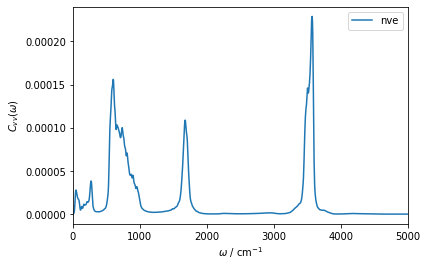

In [2]:
velFT = np.loadtxt('ex-1/nve/dir_1/nve_facf.data', usecols=(0,1))
plt.plot(velFT[:,0] * 219474,velFT[:,1], label='nve')
plt.xlim([0,5000])
plt.ylabel(r'$C_{vv}(\omega)$')
plt.xlabel(r'$\omega\ /\ \mathrm{cm}^{-1}$')
plt.legend()
plt.plot()

Repeat the same using the centroid velocity obtained with TRPMD

`$  cd ex-1/trpmd` <br>
`$  i-pi-getacf -ifile h2o-ice-trpmd.vc.xyz -mlag 1024 -ftpad 3072 -ftwin cosine-hanning -dt "1.0 femtosecond" -oprefix trpmd`

and visualize the NVE and TRPMD VDOS together. What differences do you see? Can you rationalize them?

[]

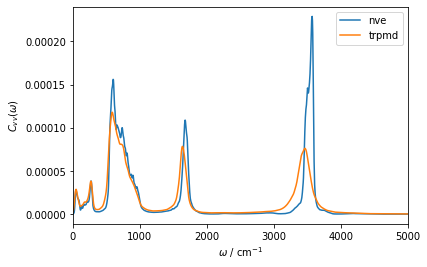

In [3]:
velFT = np.loadtxt('ex-1/nve/dir_1/nve_facf.data', usecols=(0,1))
velFT_trpmd = np.loadtxt('ex-1/trpmd/dir_1/trpmd_facf.data', usecols=(0,1))
plt.plot(velFT[:,0] * 219474,velFT[:,1], label='nve')
plt.plot(velFT_trpmd[:,0] * 219474,velFT_trpmd[:,1], label='trpmd')
plt.xlim([0,5000])
plt.ylabel(r'$C_{vv}(\omega)$')
plt.xlabel(r'$\omega\ /\ \mathrm{cm}^{-1}$')
plt.legend()
plt.plot()

Repeat the same procedure for RPMD and CMD, when you have time. For now you can look at the precomputed spectra. You’ll find many precomputed and preprocessed trajectories from each different path integral based method in the directories 

```ex-1/precomputed-trajectories/rpmd/```  <br> 
```ex-1/precomputed-trajectories/trpmd/```  <br> 
```ex-1/precomputed-trajectories/cmd/``` <br>


Visualize all Fourier transformed functions velocity autocorrelations (`*.vv`), as computed from the different methods. Can you spot the spurious resonances in RPMD and the curvature problem in CMD? And do you see that the TRPMD peaks are much broader than the classical ones?

[]

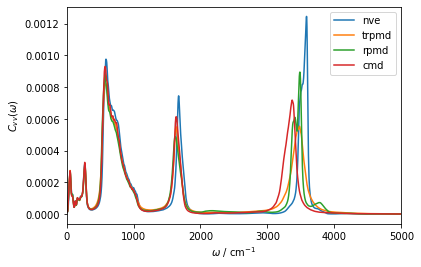

In [4]:
methods = ['nve', 'trpmd', 'rpmd', 'cmd']
for mm in methods:
    velFT = np.loadtxt('ex-1/precomputed-trajectories/' + mm +'/' + mm + '.vv', usecols=(0,1))
    plt.plot(velFT[:,0],velFT[:,1], label = '%s'%mm)
plt.xlim([0,5000])
plt.ylabel(r'$C_{vv}(\omega)$')
plt.xlabel(r'$\omega\ /\ \mathrm{cm}^{-1}$')
plt.legend()
plt.plot()

<h2> IR spectra </h2>

In order to calculate IR spectra, we need to estimate the time correlation function of the system's dipole moment, or that of the time derivative of the system's dipole moment. We need to first calculate the total dipole moment of each frame. Let us write a simple function for this.


To calculate the dipole moment of a water molecule in the TIP4PF potential, we swap the oxygen atom with a dummy atom, M, that carries a the charge and is placed at

$$ r_M = \gamma\ r_O + (1-\gamma)\ \frac{r_{H_a}+r_{H_b}}{2} $$


The dipole moment is calculated by placing partial charges at $r_{H_a}$, $r_{H_b}$ and $r_{M}$. For the purpose of calculating the IR spectrum, it is more convenient to calculate the time derivative of the dipole moment. Here we provide a snippet that reads the trajectory and prints out an XYZ file containing the time derivatibe of dipole moment vector of the full system. 


We first need to place the file containing partial charges in the NVE directory

`$  cp ../tools/charges.tip4pf nve/dir_1/`


In [5]:
# get the charges for the dipole calculation and
# store them in a dictionary
chargedict = {}
with open("ex-1/nve/dir_1/charges.tip4pf") as f:
    for line in f:
        (key, val) = line.split()
        chargedict[key] = float(val)

In [6]:
# TIP4PF setup
gamma = 0.73612
weights = np.array([gamma, 0.5-0.5*gamma, 0.5-0.5*gamma])

# determining the position of the M dummy atom
def M_pos(matrix,weights):
    coordM = np.dot(matrix.T,weights)
    return coordM

In [ ]:
# opening the .xyz file

ff = open("ex-1/nve/dir_1/h2o-ice-nve.vc.xyz")
outfile = open("ex-1/nve/dir_1/h2o-ice-nve.mu_dot.xyz", 'w')

iframe = 0
while True:
    
    try:
        rr = read_file_raw("xyz", ff)            
        ndof = len(rr['data'])                   # number of entries read in in a frame (96*3*3 = 864)
        nspecies = int(ndof / 3)                 # number of atoms in the ice slab (96*3 = 288)
        natomm = 3                               # number of atoms in the H2O molecule
        ch = np.zeros((nspecies))


        framexyz = rr['data'].reshape((int(ndof / 3), 3))
        label = rr['names']
        for z in range(nspecies):
            if(z%natomm==0):
                framexyz[z] = M_pos(framexyz[z:z+natomm,:],weights)
                label[z] = 'M'
            ch[z] = chargedict[label[z]]
        dpl = np.dot(framexyz.T,ch)

        print('1 ', file=outfile)
        print('# dummy atom  dipole_x           dipole_y           dipole_z   ', file=outfile)
        print('O %15.8e    %15.8e    %15.8e' % (dpl[0], dpl[1], dpl[2] ), file=outfile)

        iframe += 1
        
    except EOFError:
        break
    

Note that the format of the output is in an XYZ format so that it can be read by the same i-PI tool that was used to calculate the VDOS. The chemical symbol of the dummy atom (in this case Oxygen) has no bearing on the output.  Calculate using


`$  i-pi-getacf -ifile h2o-ice-nve.mu_dot.xyz -mlag 1024 -ftpad 3072 -ftwin cosine-hanning -dt "1.0 femtosecond" -oprefix nve_mu`


The IR spectrum will be proportional to the second column in `nve_mu_facf.data`. Use the following snippet to visualize

[]

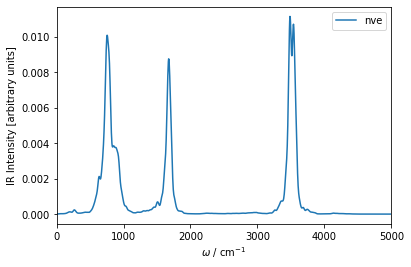

In [7]:
dplFT = np.loadtxt('ex-1/nve/dir_1/nve_mu_facf.data', usecols=(0,1))
plt.plot(dplFT[:,0] * 219474,dplFT[:,1], label='nve')
plt.xlim([0,5000])
plt.ylabel('IR Intensity [arbitrary units]')
plt.xlabel(r'$\omega\ /\ \mathrm{cm}^{-1}$')
plt.legend()
plt.plot()

Can you repeat the same to obtain the IR spectra for TRPMD, RPMD and CMD? 

For now you can look at the precomputed spectra. You’ll find many precomputed and preprocessed trajectories from each different path integral based method in the directories 

```ex-1/precomputed-trajectories/rpmd/```  <br> 
```ex-1/precomputed-trajectories/trpmd/```  <br> 
```ex-1/precomputed-trajectories/cmd/``` <br>


Visualize all Fourier transformed functions "dipole velocity" autocorrelations (`*.dpl`), as computed from the different methods.
Can you rationalize the differences in terms of the limitations of the approximate quantum dynamics methods? 

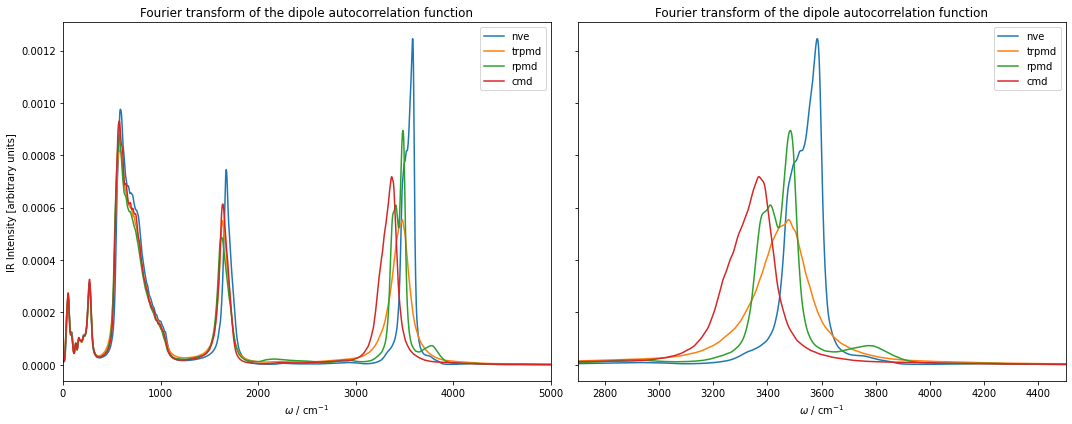

In [12]:
methods = ['nve', 'trpmd', 'rpmd', 'cmd']

fig,(ax1,ax2) = plt.subplots(1,2, figsize=[15,6], sharey=True)
ax1.set_title(r'Fourier transform of the dipole autocorrelation function')
for mm in methods:
    dplFT = np.loadtxt('ex-1/precomputed-trajectories/' + mm +'/' + mm + '.vv', usecols=(0,1))
    ax1.plot(dplFT[:,0],dplFT[:,1], label = '%s'%mm)
ax1.legend()
ax1.set_xlim([0,5000])
ax1.set_ylabel('IR Intensity [arbitrary units]')
ax1.set_xlabel(r'$\omega\ /\ \mathrm{cm}^{-1}$')


ax2.set_title(r'Fourier transform of the dipole autocorrelation function')
for mm in methods:
    dplFT = np.loadtxt('ex-1/precomputed-trajectories/' + mm +'/' + mm + '.vv', usecols=(0,1))
    ax2.plot(dplFT[:,0],dplFT[:,1], label = '%s'%mm)
ax2.set_xlim([2700,4500])
ax2.set_xlabel(r'$\omega\ /\ \mathrm{cm}^{-1}$')
ax2.legend()

plt.tight_layout()
plt.show()

<h2>Exercise 2 - Velocity imaginary time correlation function </h2>

In this exercise, we will calculate an example of an imaginary time correlation function, namely the velocity-velocity imaginary time correlation. These quantities are exact within the PI formalism and can be computed from PIMD, CMD, RPMD, and TRPMD, always yielding the same result since all these methods preserve ensemble. 

A direct estimator for the imaginary time correlation function of the imaginary time $i \lambda_j$, with $\lambda_j=j\beta_P\hbar,\ j = 0, ..., n − 1$, and $\lambda_n = \lambda_0$ is

$$c_\mathrm{vv}(i\lambda t) = \sum_k^N\Big[ \dfrac{3}{\beta_P m_k} - \dfrac{\omega_P}{P} \sum_i^{P-1} \Big\langle (q_i^{(k)}-q_{i+1}^{(k)})(q_{i+j}^{(k)}-q_{i+j+1}^{(k)})\Big\rangle\Big] $$

For hints on the derivation of the equation above, check the appendix of Ref. [4]. This expression can be recast to a centroid virial estimator form that is

$$c_\mathrm{vv}(i\lambda t) = \sum_k^N\Big[ \dfrac{3}{\beta m_k} - \dfrac{1}{P m_k} \sum_i^{P-1} \Big\langle(q_{i+j}^{(k)}-\overline{q})\dfrac{dV(q_i^{(k)})}{dq_i^{(k)}}\Big\rangle\Big] $$

where $\overline{q}$ is the centroid position. This is what we will calculate from our simulation. A script to calculate this expression is available in `tools/posforce2imaginaryvv.py`. 
Run the following commands:

```$ cd ex-2``` <br>
```$ cp -r ../ex-1/trpmd/dir_1 .``` <br>
```$ cd dir_1``` <br>
```$ python ../../tools/posforce2imaginaryvv.py h2o-ice-trpmd 200```

The file generated `h2o-ice-trpmd.imvacf` contains the velocity imaginary time correlation, where the x axis is imaginary time in units of $\lambda_j\hbar /(P β \hbar)$. Plot this quantity. For the temperature we are simulating, we know the imaginary time correlation function through an imaginary time slice from $0\ \mathrm{to}\ \beta\hbar = 38.2\ \mathrm{fs}$. A more converged imaginary time velocity correlation function is given in `ex-2/precomputed-imvacf/` .


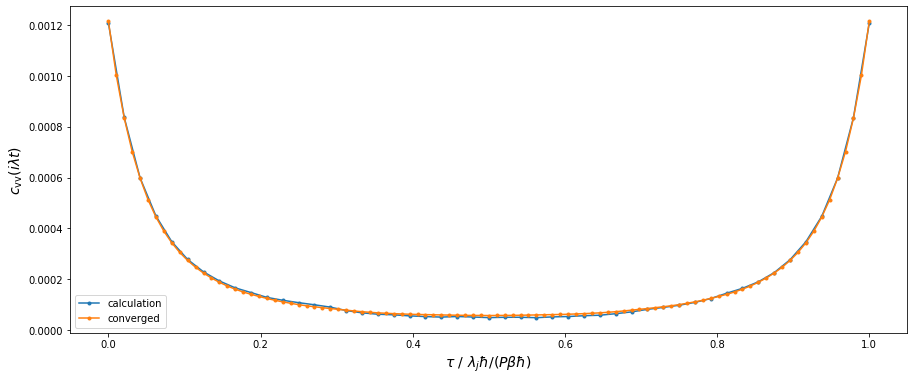

In [13]:
## PLOTTING ##
ax,fig = plt.subplots(figsize=(15,6))

imvacf = np.loadtxt('ex-2/dir_1/h2o-ice-trpmd.imvacf', usecols=(0,1))
conv_imvacf = np.loadtxt('ex-2/precomputed-imvacf/conv.imvacf', usecols=(0,1))
plt.plot(imvacf[:,0], imvacf[:,1], 'o-', ms=3, label=r'calculation')
plt.plot(conv_imvacf[:,0], conv_imvacf[:,1], 'o-', ms=3, label=r'converged')
plt.xlabel(r'$\tau\ /\ \lambda_j\hbar/(P\beta\hbar)$', fontsize=14)
plt.ylabel(r'$c_\mathrm{vv}(i\lambda t)$', fontsize=14)

plt.legend()
plt.show()

<h2>Exercise 3 - Relationship between imaginary and real time correlations</h2>

A way to check the quality of the real time autocorrelation function approximated by the PI-based methods (like the ones calculated in <strong> Exercise 1</strong>) is to look at sum rules that connect the real time with the imaginary time correlations. For the velocity real and imaginary time correlations, the relationship is 

$$c_\mathrm{vv}(i\lambda t) = \int_0^\infty f(\lambda,\omega) F_\mathrm{vv}(\omega) d\omega $$

$$f(\lambda,\omega) = \dfrac{\beta\hbar\omega \cosh({\beta\hbar\omega/2}-\lambda\hbar\omega)}{2\pi\sinh({\beta\hbar\omega/2})}$$

where $F_\mathrm{vv}(\omega)$ is the Fourier transform of the Kubo transformed real time velocity correlation function.

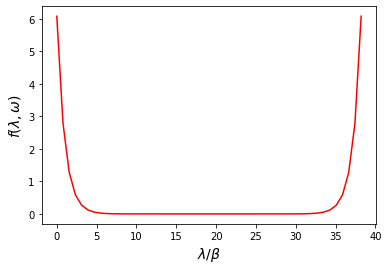

In [14]:
### Plotting the conversion factor, f(lambda,omega)
omega = 1
betahbar = 38.2

def conversionFactor(lmbdahbar, omega):
    return betahbar*omega*np.cosh((betahbar/2.-lmbdahbar)*omega)/2./np.pi/np.sinh(betahbar/2.)

lmbda = np.linspace(0,betahbar)
plt.plot(lmbda, conversionFactor(lmbda, omega), 'r-', label=r'$f(\lambda, \omega)$')
#plt.legend(loc='upper right')
plt.xlabel(r'$\lambda/\beta$', fontsize=14)
plt.ylabel(r'$f(\lambda, \omega)$', fontsize=14)
plt.show()

In Ref. [5] one can also find the expression that relates the  imaginary time square displacement and the real time velocity correlation function. Ref. [4] and references therein also point to derivations of these expressions. 

By reconstructing $c_\mathrm{vv}$ from the vibrational spectra obtained with either TRPMD, RPMD, or CMD, or even  from a simulation with classical nuclei (our NVE) and comparing to the exact $c_\mathrm{vv}(i\lambda\hbar)$ obtained in <strong>Exercise 2</strong>, one can assess (even if indirectly) how large the errors are. 
In order to reconstruct the imaginary time correlations from real time data we provide the script `tools/get_imacf_from_real.py`. The syntax is:

`python get_imacf_from_real.py [name] [temperature] [nslices]`

where `nslices` is the number of imaginary time slices (or ''beads'') one wants to reconstruct.

In the folder `ex-3/convergedspecs` you will find the files `nve.vv`, `trpmd.vv`, `rpmd.vv`, and `cmd.vv`. Type:

```$ cd ex-3/convergedspecs``` <br>
```$ python ../../tools/get_imacf_from_real.py nve.vv 200 64 > nve.imvacf``` <br>
```$ python ../../tools/get_imacf_from_real.py trpmd.vv 200 64 > trpmd.imvacf``` <br>
```$ python ../../tools/get_imacf_from_real.py rpmd.vv 200 64 > rpmd.imvacf``` <br>
```$ python ../../tools/get_imacf_from_real.py cmd.vv 200 64 > cmd.imvacf``` 

Compare all the imaginary time correlations with the one provided in `ex-2/precomputed-imvacf/`.
Are the imaginary functions reconstructed from different methods appreciably different? Can you think about reasons for their similarities/differences? (Hint: look at the expressions above.)

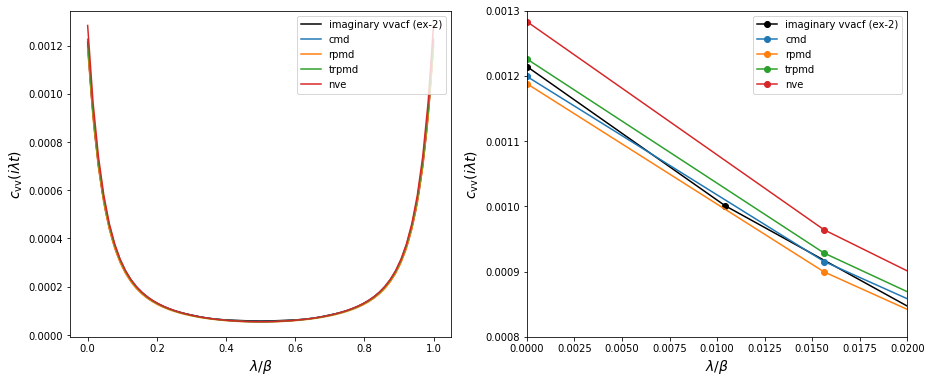

In [15]:
methods = ['cmd', 'rpmd', 'trpmd', 'nve']
imvacf = np.loadtxt('ex-2/precomputed-imvacf/conv.imvacf', usecols=(0,1))

fig,(ax1,ax2) = plt.subplots(1,2, figsize=[15,6])
ax1.plot(imvacf[:,0], imvacf[:,1], 'k-', label=r'imaginary vvacf (ex-2)')
for mm in methods:
    vv = np.loadtxt('ex-3/convergedspecs/%s.imvacf'%mm, usecols=(0,1))
    ax1.plot(vv[:,0], vv[:,1], '-', label=r'%s'%mm)
ax1.legend(loc='upper right')
ax1.set_xlabel(r'$\lambda/\beta$', fontsize=14)
ax1.set_ylabel(r'$c_\mathrm{vv}(i\lambda t)$', fontsize=14)


# panel zoomed in on the tau=0 behaviour
ax2.plot(imvacf[:,0], imvacf[:,1], 'ko-', label=r'imaginary vvacf (ex-2)')
for mm in methods:
    vv = np.loadtxt('ex-3/convergedspecs/%s.imvacf'%mm, usecols=(0,1))
    ax2.plot(vv[:,0], vv[:,1], '-o', label=r'%s'%mm)

ax2.legend()
ax2.set_xlim([0.,0.02])
ax2.set_ylim([0.0008,0.0013])
ax2.set_xlabel(r'$\lambda/\beta$', fontsize=14)
ax2.set_ylabel(r'$c_\mathrm{vv}(i\lambda t)$', fontsize=14)
plt.show() 

<h2>References</h2>
[1] Jianshu Cao and Gregory A Voth. The formulation of quantum statistical mechanics based on the Feynman path centroid density. IV. Algorithms for centroid molecular dynamics. J.  Chem. Phys., 101:6168–6183, <strong>1994</strong>. <br>
[2] I R Craig and D E Manolopoulos. Quantum statistics and classical mechanics: Real time  correlation functions from ring polymer molecular dynamics. J. Chem. Phys., 121:3368, <strong>2004</strong>. <br>
[3] Mariana Rossi, Michele Ceriotti, and David E Manolopoulos. How to remove the spurious resonances from ring polymer molecular dynamics. J. Chem. Phys., 140:234116, <strong>2014</strong>. <br>
[4] Scott Habershon, Bastiaan J Braams, and David E Manolopoulos. Quantum mechanical correlation 
functions, maximum entropy analytic continuation, and ring polymer molecular dynamics. J. Chem. Phys., 127:174108, <strong>2007</strong>. <br>
[5] Mark Tuckerman. Statistical Mechanics and Molecular Simulations. Oxford University Press, <strong>2008</strong>.
